<a href="https://colab.research.google.com/github/Syleshkumar1996/University-donor-classification/blob/main/University_donor_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np

In [ ]:
#Data cleaning


df=pd.read_excel('University advancement dataset .xlsx')

#Replacing the null values in the columm "Title" with the word "Others"
df['Title'].fillna("Others",inplace=True)

#Replacing the null values in the columns "Year of Last Gift" ,  "Year of First Gift" , "Largest Gift" with 0
df.fillna('0',inplace=True)

#Replacing the null values in the column  "Preferred Language" with the word "No_preference"
for i in (df.index):
 if (df.at[i,'Preferred Language'])!='E' and (df.at[i,'Preferred Language'])!='F':
   df.at[i,'Preferred Language']="No_preference"

df

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,Others,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,Others,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,Others,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,Others,No_preference,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,Others,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,Others,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,Others,E,F,Graduate,Arts -- General,1974,QC,0,0,0,0,3,Y,2,5
49998,149999,Others,E,M,Graduate,Arts -- General,1967,ON,0,0,0,0,1,N,0,12


In [ ]:
#Loading the historic CPI  data of Canada from the link (https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000501)
df_cpi=pd.read_csv('1810000501-eng.csv')
df_cpi=df_cpi.iloc[[8,10],]
df_cpi=df_cpi.T
df_cpi=df_cpi.reset_index()
df_cpi=df_cpi.iloc[1:,1:]
df_cpi.columns=["Year","CPI"]
df_cpi

,Year,CPI
1,1914,6
2,1915,6.1
3,1916,6.7
4,1917,7.9
5,1918,8.9
...,...,...
104,2017.0,130.4
105,2018.0,133.4
106,2019.0,136.0
107,2020.0,137.0


In [ ]:
#Preprocessing data for merging
df_cpi["Year"] = pd.to_numeric(df_cpi["Year"])
df_cpi["CPI"] = pd.to_numeric(df_cpi["CPI"])
df["Year of Last Gift"] = pd.to_numeric(df["Year of Last Gift"])
df["Year of First Gift"] = pd.to_numeric(df["Year of First Gift"])

#New column creation:  CPI(Year of Last Gift)
df_new=pd.merge(df,df_cpi,how="left",left_on='Year of Last Gift',right_on="Year" )
df_new.drop('Year',axis=1,inplace=True)
df_new.rename(columns={'CPI':'CPI(Year of Last Gift)'},inplace=True)

#New column creation:  CPI(Year of First Gift)
df_new=pd.merge(df_new,df_cpi,how="left",left_on='Year of First Gift',right_on="Year" )
df_new.drop('Year',axis=1,inplace=True)
df_new.rename(columns={'CPI':'CPI(Year of First Gift)'},inplace=True)

df_new

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,CPI(Year of Last Gift),CPI(Year of First Gift)
0,100001,Others,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27,90.4,36.6
1,100002,Others,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19,15.9,15.7
2,100003,Others,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18,15.7,15.7
3,100004,Others,No_preference,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10,78.4,65.6
4,100005,Others,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16,20.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1,20.3,19.7
49996,149997,Others,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20,92.9,85.6
49997,149998,Others,E,F,Graduate,Arts -- General,1974,QC,0,0.0,0.0,0,3,Y,2,5,NaN,NaN
49998,149999,Others,E,M,Graduate,Arts -- General,1967,ON,0,0.0,0.0,0,1,N,0,12,NaN,NaN


In [ ]:
#New column creation : To identify whether the person is "Former Faculty/Staff" or not
for i in df_new.index:
 if "Former Faculty/Staff" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Former Faculty/Staff']=1
 else:
  df_new.at[i,'Former Faculty/Staff']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Past Student" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Past Student']=1
 else:
  df_new.at[i,'Past Student']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Past Parent" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Past Parent']=1
 else:
  df_new.at[i,'Past Parent']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Current Parent" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Current Parent']=1
 else:
  df_new.at[i,'Current Parent']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Student" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Student']=1
 else:
  df_new.at[i,'Student']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Faculty/Staff" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Faculty/Staff']=1
 else:
  df_new.at[i,'Faculty/Staff']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Grandparent" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Grandparent']=1
 else:
  df_new.at[i,'Grandparent']=0

#New column creation : To identify whether the person is "Past Student" or not
for i in df_new.index:
 if "Widow/er of a Grad" in (df_new.at[i,'Relationship Types']):
  df_new.at[i,'Widow/er of a Grad']=1
 else:
  df_new.at[i,'Widow/er of a Grad']=0

#Dropping Relationship types
df_new.drop(columns='Relationship Types',inplace=True)

df_new

,ID Number,Title,Preferred Language,Gender,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,...,CPI(Year of Last Gift),CPI(Year of First Gift),Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad
0,100001,Others,E,M,Medicine -- General,1968,ON,73600,1997.0,1978.0,...,90.4,36.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,Others,E,M,Arts -- General,1958,NB,8035,1962.0,1961.0,...,15.9,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,Others,E,F,Science -- General,1963,ON,9675,1961.0,1961.0,...,15.7,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,Others,No_preference,M,Education -- General,1960,BC,4070,1990.0,1986.0,...,78.4,65.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,Others,E,M,Management,1955,QC,13377,1970.0,1957.0,...,20.3,14.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Engineer -- General,1960,ON,9174,1970.0,1969.0,...,20.3,19.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,149997,Others,E,F,Arts -- General,1992,MB,38181,1999.0,1993.0,...,92.9,85.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,149998,Others,E,F,Arts -- General,1974,QC,0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,149999,Others,E,M,Arts -- General,1967,ON,0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Inflation adjusted value of the donations is calculated
#Inflation_adjusted_lifetime_donation =  (Lifetime Giving)* (Current CPI)/(Average CPI during donation period)
#Average CPI during donation period = (CPI(Year of Last Gift) +  CPI(Year of First Gift) )/2
#Current CPI = 141.6
for i in df_new.index:
  df_new.at[i,'Inflation_adjusted_lifetime_donation']=(df_new.at[i,'Lifetime Giving']  * 141.6) / ( (df_new.at[i,'CPI(Year of Last Gift)'] + df_new.at[i,'CPI(Year of First Gift)'])/2  )
df_new['Inflation_adjusted_lifetime_donation'].fillna(value=0,inplace=True)
df_new

,ID Number,Title,Preferred Language,Gender,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,...,CPI(Year of First Gift),Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,Inflation_adjusted_lifetime_donation
0,100001,Others,E,M,Medicine -- General,1968,ON,73600,1997.0,1978.0,...,36.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164122.204724
1,100002,Others,E,M,Arts -- General,1958,NB,8035,1962.0,1961.0,...,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72009.873418
2,100003,Others,E,F,Science -- General,1963,ON,9675,1961.0,1961.0,...,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87259.872611
3,100004,Others,No_preference,M,Education -- General,1960,BC,4070,1990.0,1986.0,...,65.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8004.333333
4,100005,Others,E,M,Management,1955,QC,13377,1970.0,1957.0,...,14.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107930.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Engineer -- General,1960,ON,9174,1970.0,1969.0,...,19.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64951.920000
49996,149997,Others,E,F,Arts -- General,1992,MB,38181,1999.0,1993.0,...,85.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60576.242017
49997,149998,Others,E,F,Arts -- General,1974,QC,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
49998,149999,Others,E,M,Arts -- General,1967,ON,0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
#Calculating the percentile of donors based on their inflation adjusted lifetime donation
df_new['donation_percentile'] =  (df_new['Inflation_adjusted_lifetime_donation'].rank(pct=True)) 
df_new

,ID Number,Title,Preferred Language,Gender,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,...,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,Inflation_adjusted_lifetime_donation,donation_percentile
0,100001,Others,E,M,Medicine -- General,1968,ON,73600,1997.0,1978.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164122.204724,0.97110
1,100002,Others,E,M,Arts -- General,1958,NB,8035,1962.0,1961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72009.873418,0.94614
2,100003,Others,E,F,Science -- General,1963,ON,9675,1961.0,1961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87259.872611,0.95320
3,100004,Others,No_preference,M,Education -- General,1960,BC,4070,1990.0,1986.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8004.333333,0.86074
4,100005,Others,E,M,Management,1955,QC,13377,1970.0,1957.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107930.666667,0.95968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Engineer -- General,1960,ON,9174,1970.0,1969.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64951.920000,0.94148
49996,149997,Others,E,F,Arts -- General,1992,MB,38181,1999.0,1993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60576.242017,0.93844
49997,149998,Others,E,F,Arts -- General,1974,QC,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33915
49998,149999,Others,E,M,Arts -- General,1967,ON,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33915


In [ ]:
#Categorizing the donors based on their percentile
for i in df_new.index:

  if df_new.at[i,'donation_percentile']<0.85 :
     df_new.at[i,'donor_category']=1
  if df_new.at[i,'donation_percentile']>=0.85 and df_new.at[i,'donation_percentile']<0.95:
     df_new.at[i,'donor_category']=2
  if df_new.at[i,'donation_percentile']>=0.95:
     df_new.at[i,'donor_category']=3
df_new

,ID Number,Title,Preferred Language,Gender,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,...,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,Inflation_adjusted_lifetime_donation,donation_percentile,donor_category
0,100001,Others,E,M,Medicine -- General,1968,ON,73600,1997.0,1978.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164122.204724,0.97110,3.0
1,100002,Others,E,M,Arts -- General,1958,NB,8035,1962.0,1961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72009.873418,0.94614,2.0
2,100003,Others,E,F,Science -- General,1963,ON,9675,1961.0,1961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87259.872611,0.95320,3.0
3,100004,Others,No_preference,M,Education -- General,1960,BC,4070,1990.0,1986.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8004.333333,0.86074,2.0
4,100005,Others,E,M,Management,1955,QC,13377,1970.0,1957.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107930.666667,0.95968,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Others,E,M,Engineer -- General,1960,ON,9174,1970.0,1969.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64951.920000,0.94148,2.0
49996,149997,Others,E,F,Arts -- General,1992,MB,38181,1999.0,1993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60576.242017,0.93844,2.0
49997,149998,Others,E,F,Arts -- General,1974,QC,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33915,1.0
49998,149999,Others,E,M,Arts -- General,1967,ON,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33915,1.0


** **bold text**GRAPHS TO BE DONE AT THIS POINT**

In [ ]:
#Removing unwanted columns 
df_new.drop(columns=['ID Number','Year of Last Gift','Year of First Gift','Largest Gift','Lifetime Giving','CPI(Year of Last Gift)','CPI(Year of First Gift)','Inflation_adjusted_lifetime_donation','donation_percentile'],inplace=True)
df_new

,Title,Preferred Language,Gender,Faculty of Graduation,Year of Graduation,Province,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,Others,E,M,Medicine -- General,1968,ON,0,N,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,Others,E,M,Arts -- General,1958,NB,14,N,1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,Others,E,F,Science -- General,1963,ON,15,N,1,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,Others,No_preference,M,Education -- General,1960,BC,14,N,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,Others,E,M,Management,1955,QC,0,N,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Others,E,M,Engineer -- General,1960,ON,15,Y,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,Others,E,F,Arts -- General,1992,MB,8,N,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,Others,E,F,Arts -- General,1974,QC,3,Y,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,Others,E,M,Arts -- General,1967,ON,1,N,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Preferred Language" 
 
dummies= pd.get_dummies(df_new['Preferred Language'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Preferred Language',inplace=True)
df_new


,F,No_preference,Title,Gender,Faculty of Graduation,Year of Graduation,Province,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,0,0,Others,M,Medicine -- General,1968,ON,0,N,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,Others,M,Arts -- General,1958,NB,14,N,1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,Others,F,Science -- General,1963,ON,15,N,1,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,1,Others,M,Education -- General,1960,BC,14,N,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0,0,Others,M,Management,1955,QC,0,N,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,Others,M,Engineer -- General,1960,ON,15,Y,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,0,Others,F,Arts -- General,1992,MB,8,N,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,0,0,Others,F,Arts -- General,1974,QC,3,Y,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,0,Others,M,Arts -- General,1967,ON,1,N,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Title" 
 
dummies= pd.get_dummies(df_new['Title'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Title',inplace=True)
df_new

,"Chairman, CEO",Others,President,F,No_preference,Gender,Faculty of Graduation,Year of Graduation,Province,Events Attended in Lifetime,...,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,0,1,0,0,0,M,Medicine -- General,1968,ON,0,...,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,1,0,0,0,M,Arts -- General,1958,NB,14,...,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,1,0,0,0,F,Science -- General,1963,ON,15,...,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,1,0,0,1,M,Education -- General,1960,BC,14,...,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0,1,0,0,0,M,Management,1955,QC,0,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,M,Engineer -- General,1960,ON,15,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,1,0,0,0,F,Arts -- General,1992,MB,8,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,0,1,0,0,0,F,Arts -- General,1974,QC,3,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,1,0,0,0,M,Arts -- General,1967,ON,1,...,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Gender" 
 
dummies= pd.get_dummies(df_new['Gender'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Gender',inplace=True)
df_new

,M,U,"Chairman, CEO",Others,President,F,No_preference,Faculty of Graduation,Year of Graduation,Province,...,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,1,0,0,1,0,0,0,Medicine -- General,1968,ON,...,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1,0,0,1,0,0,0,Arts -- General,1958,NB,...,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,0,1,0,0,0,Science -- General,1963,ON,...,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1,0,0,1,0,0,1,Education -- General,1960,BC,...,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1,0,0,1,0,0,0,Management,1955,QC,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,1,0,0,0,Engineer -- General,1960,ON,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,0,0,1,0,0,0,Arts -- General,1992,MB,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,0,0,0,1,0,0,0,Arts -- General,1974,QC,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,1,0,0,1,0,0,0,Arts -- General,1967,ON,...,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Faculty of Graduation" 
dummies= pd.get_dummies(df_new['Faculty of Graduation'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Faculty of Graduation',inplace=True)
df_new

,Agr&Env -- General,Agr&Env -- MSE,Arts -- General,Arts -- Information (Library) Studies,Arts -- MSE,Arts -- Social Work,Continuing Education,Dentistry,Education -- General,Engineer -- Architect,...,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,0,0,0,0,0,0,0,0,0,0,...,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,1,0,0,0,0,0,0,0,...,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,0,0,0,0,0,0,0,1,0,...,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,0,1,0,0,0,0,0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,0,0,1,0,0,0,0,0,0,0,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,0,1,0,0,0,0,0,0,0,...,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Province" 
 
dummies= pd.get_dummies(df_new['Province'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Province',inplace=True)
df_new

,BC,MB,NB,NL,NS,NT,ON,PE,QC,SK,...,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,0,0,0,0,0,0,1,0,0,0,...,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,1,0,0,0,0,0,0,0,...,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,0,0,0,0,1,0,0,0,...,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1,0,0,0,0,0,0,0,0,0,...,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0,0,0,0,0,0,0,0,1,0,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,1,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,1,0,0,0,0,0,0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,0,0,0,0,0,0,0,0,1,0,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,0,0,0,0,0,1,0,0,0,...,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#One hot encoding : "Past Traveler Y/N" 
 
dummies= pd.get_dummies(df_new['Past Traveler Y/N'])
dummies=dummies.iloc[:,1:]
df_new=pd.concat([dummies,df_new],axis=1)
df_new.drop(columns='Past Traveler Y/N',inplace=True)
df_new

,Y,BC,MB,NB,NL,NS,NT,ON,PE,QC,...,# of Clicks in the Past Month,Former Faculty/Staff,Past Student,Past Parent,Current Parent,Student,Faculty/Staff,Grandparent,Widow/er of a Grad,donor_category
0,0,0,0,0,0,0,0,1,0,0,...,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,0,1,0,0,0,0,0,0,...,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,0,0,0,0,0,1,0,0,...,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,1,0,0,0,0,0,0,0,0,...,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0,0,0,0,0,0,0,0,0,1,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,1,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49996,0,0,1,0,0,0,0,0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
49997,1,0,0,0,0,0,0,0,0,1,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,0,0,0,0,0,0,1,0,0,...,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Test_train split
from sklearn.model_selection import train_test_split
X = df_new.iloc[:,:55]
y = df_new.donor_category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [ ]:
#XG boost classifier_score
from sklearn.ensemble import GradientBoostingClassifier
model_xg=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model_xg.fit(X_train, y_train)
model_xg.score(X_test, y_test)

0.8574

Text(42.0, 0.5, 'Truth')

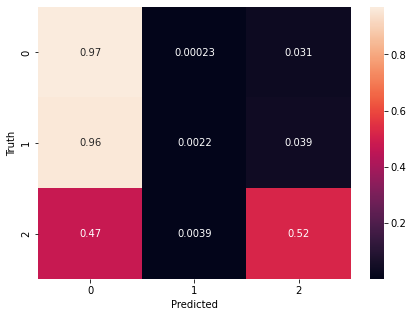

In [ ]:
#XG boost classifier_Confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_predicted_xg = model_xg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted_xg)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7,5))
sn.heatmap(cmn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Random forrest classifier_score
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8522

Text(42.0, 0.5, 'Truth')

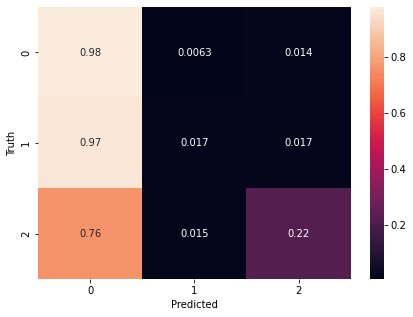

In [ ]:
#Random forrest classifier_Confusion matrix
y_predicted_rf = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_predicted_rf)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7,5))
sn.heatmap(cmn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Decition tree classifier_score
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.7862

Text(42.0, 0.5, 'Truth')

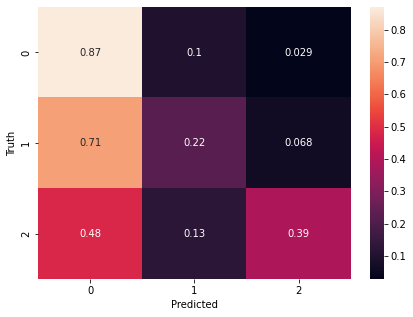

In [ ]:
#Decition tree classifier_Confusion matrix
y_predicted_dt = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_predicted_dt)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7,5))
sn.heatmap(cmn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')